### Implementação de clusterização k_means do zero

Camila Limons

In [11]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import random
from sklearn.datasets import make_blobs
from scipy.spatial import distance
from sklearn.cluster import KMeans

Criação de base de dados sintética usando make_blobs.

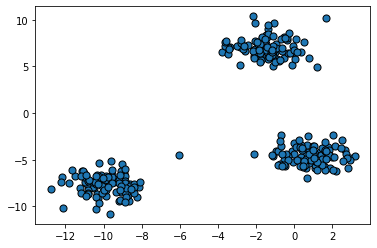

In [12]:
x1, y1 = make_blobs(n_samples = 300, n_features = 2, random_state=100, centers=3)
plt.scatter(x1[:,0], x1[:,1], marker='o', edgecolor='black', s = 50)
plt.show()

Criar método com nome do_kmeans_clustering, que receba um parâmetro k, um parâmetro X e um parâmetro random state, representando número de clusters, dados e inteiro (a ser usado como seed para função random), respectivamente.

In [16]:
def do_kmeans_clustering (k, X, random_state):
    
    random.seed(random_state)
    num_instances = X.shape[0]
    num_features = X.shape[1]      
    center = np.zeros([k,num_features], dtype = float)         
    dist = np.zeros([k], dtype=float)    
    new_cluster=[]
    aux = 0   
    
    #Inicialização randômica dos centróides
    for j in range(k):
        center[j] = X[random.randint(0,num_instances-1)]
    print("Centróides iniciais: \n", center)
    
    while (aux ==0):
        aux = 1
        old_cluster = new_cluster
        new_cluster=[] 
        media = np.zeros([k,num_features], dtype=float)
        
        #Cálculo das distâncias
        for i in range(num_instances):
            for j in range(k):
                dist[j] = distance.euclidean(X[i],center[j])   
            new_cluster.append(np.argmin(dist))  
         
        #Cálculo novos centróides
        for j in range(k):     
            cont = 0
            for i in range(num_instances):
                if new_cluster[i] == j:
                    media[j] = media[j] + X[i]   
                    cont = cont+1            
            media[j] = media[j]/cont        
       
        #Verificação se os centróides e clusters mudaram
            for l in range(num_features):
                if (media[j,l] != center[j,l]):
                    aux = 0  
            if (new_cluster != old_cluster):
                aux = 0    
        center = media      
    return (center, new_cluster)

Criação de método para plotar os grupos finais.

In [17]:
def plot_dados_finais (center,cluster, X):
    plt.figure(figsize=[8,6])
    plt.scatter(X[:,0], X[:,1], marker='o', c=cluster, s = 70, edgecolor='k')
    plt.scatter(center[:,0], center[:,1], marker='s', color = 'red', s =70, edgecolor='k')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Grupos finais e Centróides')
    plt.show()

Treinamento com k = 3 e random_state = 30.

Centróides iniciais: 
 [[-9.02957169 -5.41239759]
 [-0.07194733 -5.26054466]
 [-0.80746368  5.61161784]]


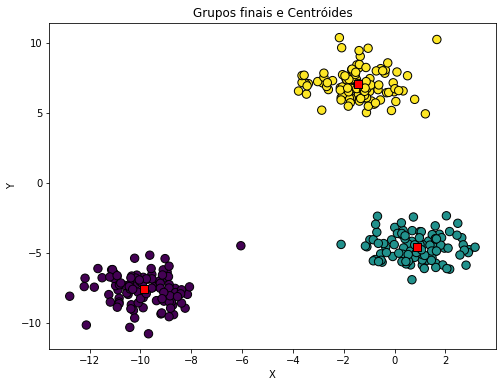

Centróides finais:
 [[-9.86760177 -7.61037522]
 [ 0.86630547 -4.60164258]
 [-1.44984633  7.01887513]]


In [18]:
center, cluster = do_kmeans_clustering(3,x1,30)
plot_dados_finais(center,cluster,x1)
print('Centróides finais:\n',center)

Validação com a função kmeans do sklearn:

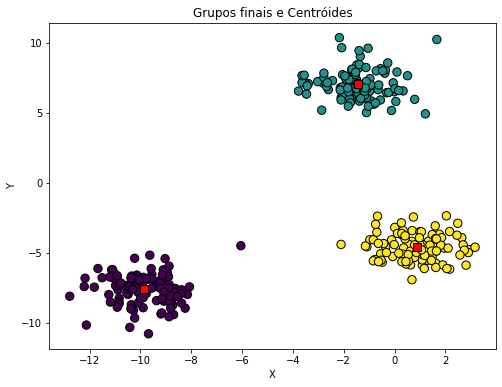

Centróides finais:
 [[-9.86760177 -7.61037522]
 [-1.44984633  7.01887513]
 [ 0.86630547 -4.60164258]]


In [19]:
kmeans = KMeans(n_clusters=3, random_state=30).fit(x1)
y_kmeans = kmeans.predict(x1)
plot_dados_finais(kmeans.cluster_centers_,y_kmeans,x1)
print('Centróides finais:\n',kmeans.cluster_centers_)

#### Experimentos
1 . Experimentos com diferentes valores para o random state na inicialização de centróides:


Centróides iniciais: 
 [[-10.916658    -6.62611071]
 [  1.10594346  -4.41906375]
 [ -2.43889538   7.29393907]]


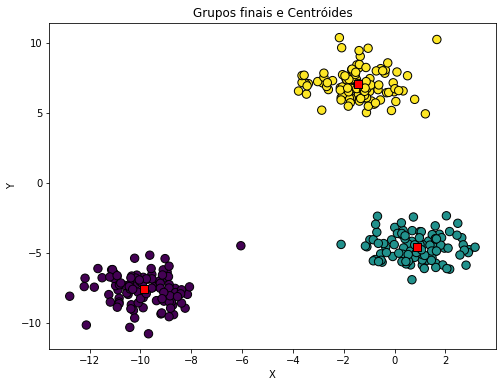

In [20]:
#Teste 1 - Random state igual a 10
center, cluster = do_kmeans_clustering(3,x1,10)
plot_dados_finais(center,cluster,x1)

Centróides iniciais: 
 [[  0.50943793   7.64292606]
 [-11.04740157  -6.82221543]
 [ -1.40787241   8.20386947]]


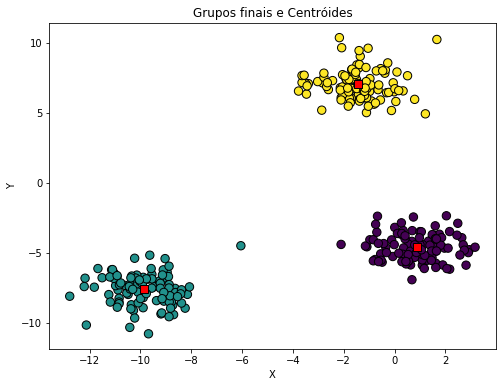

In [21]:
#Teste 2 - Random state igual a 20
center, cluster = do_kmeans_clustering(3,x1,20)
plot_dados_finais(center,cluster,x1)

Centróides iniciais: 
 [[ 1.59909918 -3.07105617]
 [ 0.99834729 -3.48325143]
 [-2.1715859  10.36074979]]


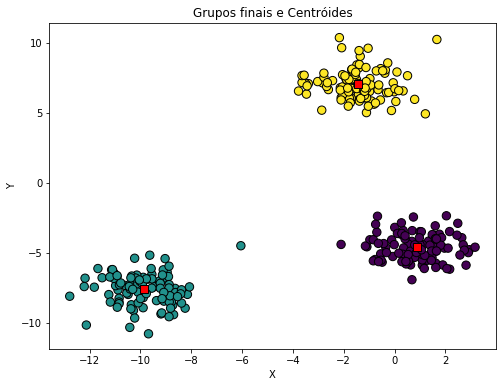

In [22]:
#Teste 3 - Random state igual a 50
center, cluster = do_kmeans_clustering(3,x1,50)
plot_dados_finais(center,cluster,x1)

Centróides iniciais: 
 [[-2.43889538  7.29393907]
 [-0.97308946 -4.06651907]
 [-3.77880518  6.54735201]]
Nº de iterações até convergir:  39


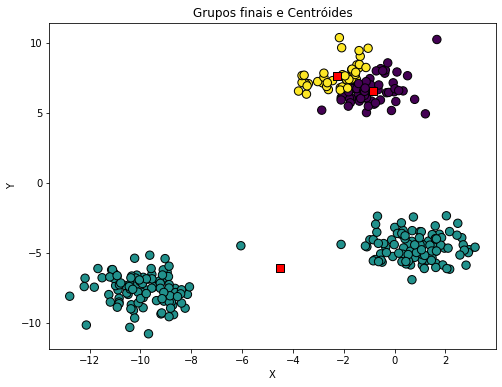

In [11]:
#Teste 4 - Random state igual a 1000
center, cluster = do_kmeans_clustering(3,x1,1000)
plot_dados_finais(center,cluster,x1)

### Considerações a respeito da variação do random state:
* Ao diminuir o random state para 10 (teste 1), o número de iterações se manteve, embora os centróides iniciais tenham sido diferentes. O resultado final foi o mesmo do que com o random state proposto.
* Ao utilizar o random state de 20 e 50 (teste 2 e 3), o número de iterações aumentou em relação às iterações com random state proposto. Observando os centróides iniciais escolhidos, é possível entender o porquê desse aumento de iterações, uma vez que os centróides iniciais escolhidos estão mais distantes dos centróides finais.
* Utilizando random state = 1000 (teste 5), houve uma alteração nos clusters e centróides finais, além de precisar de uma quantidade muito maior de iterações para convergir. 

A conclusão final é que a escolha adequada dos centróides iniciais influencia bastante na quantidade de iterações e no resultado final sendo que, em um dos testes ocorreu uma clusterização diferente das demais.

2. Realize experimentos com diferentes valores de k (número de clusters). O que você pode observar?

Centróides iniciais: 
 [[-9.02957169 -5.41239759]
 [-0.07194733 -5.26054466]]
Nº de iterações até convergir:  4


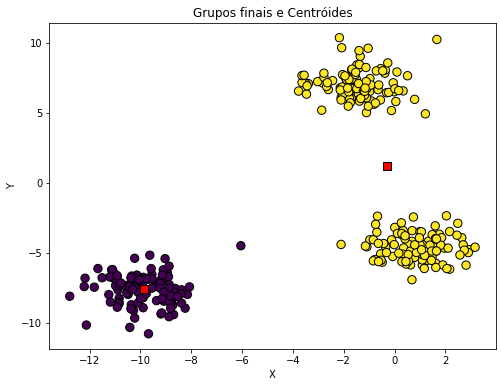

In [13]:
#Teste 5 - Número de clusters igual a 2
center, cluster = do_kmeans_clustering(2,x1,30)
plot_dados_finais(center,cluster,x1)

Centróides iniciais: 
 [[-9.02957169 -5.41239759]
 [-0.07194733 -5.26054466]
 [-0.80746368  5.61161784]
 [-1.68654505  7.40257015]]
Nº de iterações até convergir:  16


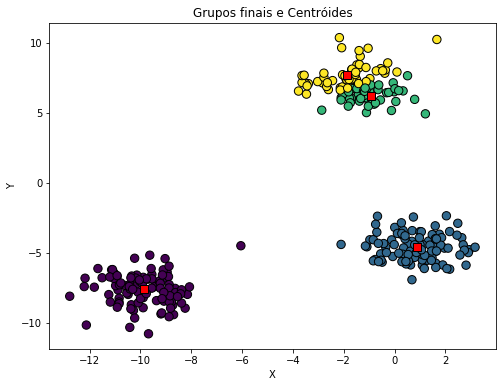

In [14]:
#Teste 6 - Número de clusters igual a 4
center, cluster = do_kmeans_clustering(4,x1,30)
plot_dados_finais(center,cluster,x1) 

Centróides iniciais: 
 [[-9.02957169 -5.41239759]
 [-0.07194733 -5.26054466]
 [-0.80746368  5.61161784]
 [-1.68654505  7.40257015]
 [-1.10194166  6.06724225]]
Nº de iterações até convergir:  70


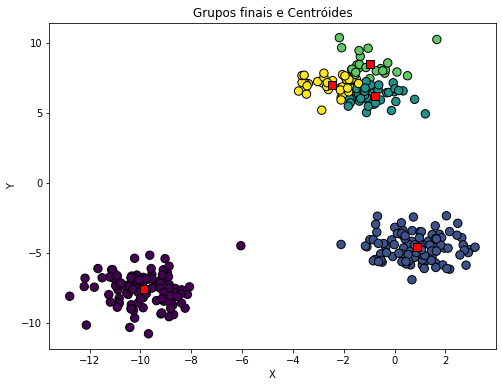

In [15]:
#Teste 7 - Número de clusters igual a 5
center, cluster = do_kmeans_clustering(5,x1,30)
plot_dados_finais(center,cluster,x1) 

### Considerações a respeito da alteração no número de clusters:

* Fazendo alterações apenas número de clusters, notamos que o número de clusters impacta de forma diretamente proporcional no número de iterações até a definição dos grupos finais, como podemos notar nos testes de 5 a 7.

* Como a base gerada possui centro igual a 3, percebemos que, ao utilizar um número de clusters menor, o KMeans juntou os dois grupos que estavam mais próximos entre si (considerando os centróides iniciais).

* Um aumento do número de clusters fez o contrário, separando em mais de um cluster os grupos que não estavam tão "unidos" (considerando os centróides iniciais).

2.2. O que acontece se você variar o valor de k e o random state na inicializaçãoo de centróides, ao
mesmo tempo?

Centróides iniciais: 
 [[-2.04628861  7.71864705]
 [-1.1785765   6.5290264 ]]
Nº de iterações até convergir:  6


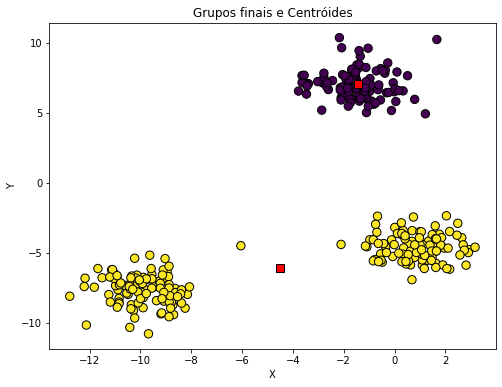

In [17]:
# Teste 8 - Número de clusters igual a 2, random_state = 100 (diminuindo clusters e aumentando random state)
center, cluster = do_kmeans_clustering(2,x1,100)
plot_dados_finais(center,cluster,x1)

Centróides iniciais: 
 [[-10.916658    -6.62611071]
 [  1.10594346  -4.41906375]]
Nº de iterações até convergir:  4


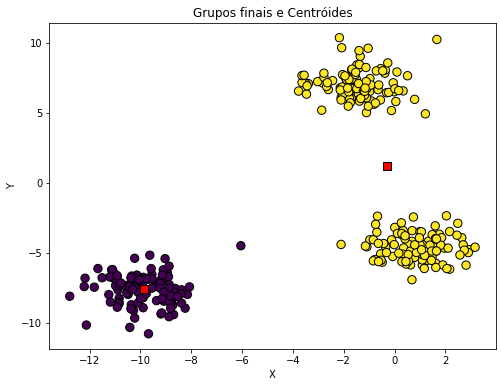

In [18]:
# Teste 9 - Número de clusters igual a 2, random_state = 10 (diminuindo clusters e diminuindo random state )
center, cluster = do_kmeans_clustering(2,x1,10)
plot_dados_finais(center,cluster,x1)

Centróides iniciais: 
 [[-10.916658    -6.62611071]
 [  1.10594346  -4.41906375]
 [ -2.43889538   7.29393907]
 [  2.10500672  -4.66289698]]
Nº de iterações até convergir:  32


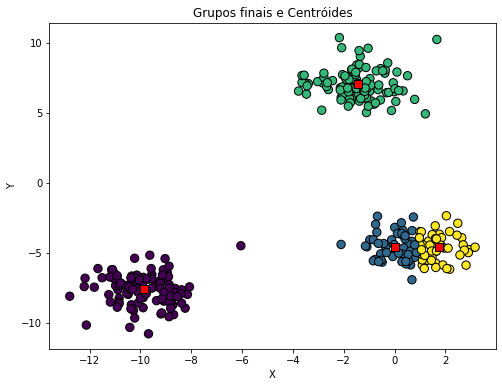

In [19]:
# Teste 10 - Número de clusters igual a 4, random_state = 10 (aumentando clusters e diminuindo random state)
center, cluster = do_kmeans_clustering(4,x1,10)
plot_dados_finais(center,cluster,x1)

Centróides iniciais: 
 [[-2.04628861  7.71864705]
 [-1.1785765   6.5290264 ]
 [ 0.41007185 -3.99744881]
 [ 1.66374234 10.22972616]]
Nº de iterações até convergir:  12


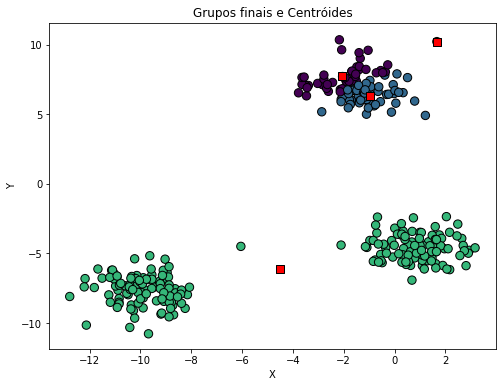

In [20]:
# Teste 11 - Número de clusters igual a 4, random_state = 100 (aumentando clusters e aumentando random state)
center, cluster = do_kmeans_clustering(4,x1,100)
plot_dados_finais(center,cluster,x1)

### Considerações a respeito da variação simultânea do random state e número de clusters

* Ao alterar os dois parâmetros ao mesmo tempo, não identificamos um padrão de mudança nas quantidades de iterações.
<br />
* É possível verificar que, com números de clusters diferentes de 3, a variação do random_state causa alterações muito mais significativas no resultado final. Isso pode ser explicado pelo fato dos dados estarem claramentes divididos em 3 grupos. Dessa forma, ao utilizar um número maior ou menor de grupos, a clusterização ocorre de uma forma um pouco mais aleatória. Em um dos casos, inclusive, o algoritmo chegou a classificar um único outlier como um cluster (Teste 11).



# Conclusões

<p>O algoritmo do KMeans é bastante intuitivo e a sua implementação do zero facilita o entendimento do mesmo.</p>
<p>A escolha do número de clusters e dos centróides iniciais é de extrema importância para que o agrupamento final dos dados ocorra de forma satisfatória. Essa é inclusive, uma desvantagem do algoritmo uma vez que, para uma base de dados desconhecida pode ser bastante difícil fazer essa definição de números de clusters.</p>
<p>Para melhorar o desempenho do algoritmo, pode ser necessário utilizar algum método para escolher o número de clusters e verificar outras formas de inicializar os centróides.</p>




